# Master equation model of the alanine pentapeptide

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.2)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [2]:
import mdtraj as md
from mastermsm.trajectory import traj

First we load the trajectory

In [3]:
tr_ala5 = traj.TimeSeries(top='data/ala5_ff99sbildn_nowat.gro',\
        traj=['data/ala5_ff99sbildn_tip3p_nvt_proc.xtc'])

In [4]:
len(tr_ala5.mdt)

250001

In [5]:
tr_ala5.discretize(method="contacts")

In [6]:
tr_ala5.find_keys()
tr_ala5.keys.sort()

In [7]:
#md_traj_full = md.load_xtc("data/%s_nvt.xtc"%root, \
md_traj_full = md.load_xtc("data/ala5_ff99sbildn_tip3p_nvt_proc.xtc", \
        top="data/ala5_ff99sbildn_nowat.gro")
dists = md.compute_contacts(md_traj_full, contacts='all',\
                            periodic=True)

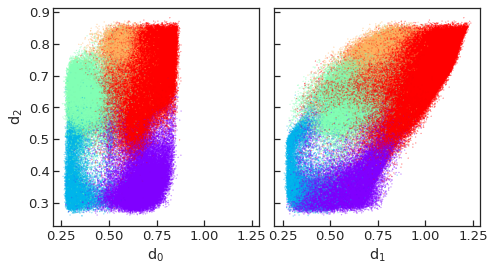

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(7,4), sharex=True, sharey=True)
ax[0].scatter(dists[0][:,0], dists[0][:,2], marker='.', \
              c=tr_ala5.distraj, s=0.15, cmap='rainbow')
ax[1].scatter(dists[0][:,1], dists[0][:,2], marker='.', \
              c=tr_ala5.distraj, s=0.15, cmap='rainbow')
ax[1].set_xlabel('d$_1$')
ax[0].set_xlabel('d$_0$')
ax[0].set_ylabel('d$_2$')
plt.tight_layout()

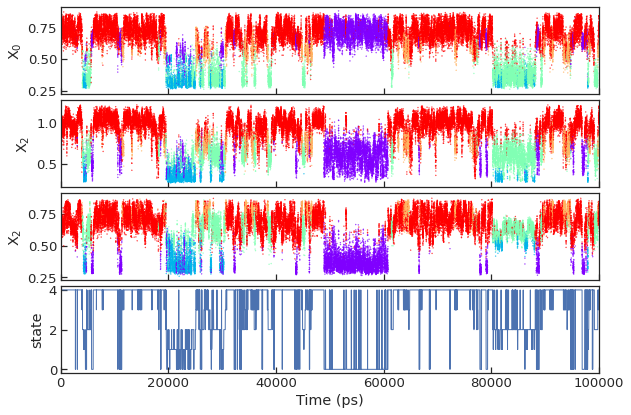

In [9]:
fig, ax = plt.subplots(4, 1, figsize=(9,6), sharex=True)

ax[0].scatter(tr_ala5.mdt.time, \
              dists[0][:,0], marker='.', \
              c=tr_ala5.distraj, s=0.5, cmap='rainbow')

ax[1].scatter(tr_ala5.mdt.time,\
              dists[0][:,1], marker='.', \
              c=tr_ala5.distraj, s=0.5, cmap='rainbow')

ax[2].scatter(tr_ala5.mdt.time,\
              dists[0][:,2], marker='.', \
              c=tr_ala5.distraj, s=0.5, cmap='rainbow')

ax[3].plot(tr_ala5.mdt.time, \
           tr_ala5.distraj, lw=1)

ax[0].set_xlim(0,100000)
ax[-1].set_xlabel('Time (ps)')
ax[0].set_ylabel('X$_0$')
ax[1].set_ylabel('X$_2$')
ax[2].set_ylabel('X$_2$')
ax[3].set_ylabel('state')
plt.tight_layout(h_pad=0)

In [10]:
from mastermsm.msm import msm
msm_ala5 = msm.SuperMSM([tr_ala5], sym=False)


 Building MSM from 
 [['data/ala5_ff99sbildn_tip3p_nvt_proc.xtc']]
     # states: 5


In [ ]:
msm_ala5.convergence_test(time=[10, 30, 50, 100, 300, 500], \
                          error=True)

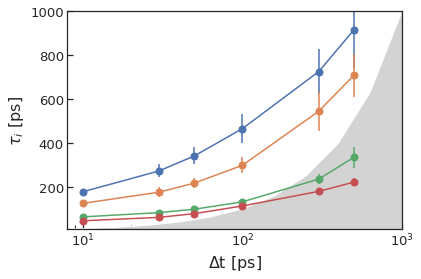

In [17]:
fig, ax = plt.subplots()
for i in range(4):
    tau_vs_lagt = np.array([[x, msm_ala5.msms[x].tauT[i],\
                             msm_ala5.msms[x].tau_std[i]] \
               for x in [10, 30, 50, 100, 300, 500]])
    ax.errorbar(tau_vs_lagt[:,0],tau_vs_lagt[:,1], \
                yerr=tau_vs_lagt[:,2], fmt='o-', \
                markersize=7)
#ax.plot(tau_vs_lagt[:,0],tau_vs_lagt[:,0])
ax.fill_between(10**np.arange(-0.2,4,0.2), 1e-1, \
                10**np.arange(-0.2,4,0.2), facecolor='lightgray')
ax.set_xlabel(r'$\Delta$t [ps]', fontsize=16)
ax.set_ylabel(r'$\tau_i$ [ps]', fontsize=16)
ax.set_xlim(8,1000)
ax.set_ylim(1e1,1e3)
_ = ax.set_xscale('log')
#_ = ax.set_yscale('log')